# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chinde
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | loen
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mil'kovo
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | minas de marcona
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bijar
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | guano
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | san antonio de pale
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chinde,26.8418,88.0763,22.58,21,60,3.36,NP,1713707165
1,adamstown,-25.0660,-130.1015,22.47,75,94,11.22,PN,1713707050
2,loen,7.7601,168.2307,27.82,82,100,8.62,MH,1713707166
3,hadibu,12.6500,54.0333,29.08,69,67,1.86,YE,1713707167
4,bilibino,68.0546,166.4372,-17.47,95,100,0.96,RU,1713707167


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chinde,26.8418,88.0763,22.58,21,60,3.36,NP,1713707165
1,adamstown,-25.0660,-130.1015,22.47,75,94,11.22,PN,1713707050
2,loen,7.7601,168.2307,27.82,82,100,8.62,MH,1713707166
3,hadibu,12.6500,54.0333,29.08,69,67,1.86,YE,1713707167
4,bilibino,68.0546,166.4372,-17.47,95,100,0.96,RU,1713707167


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

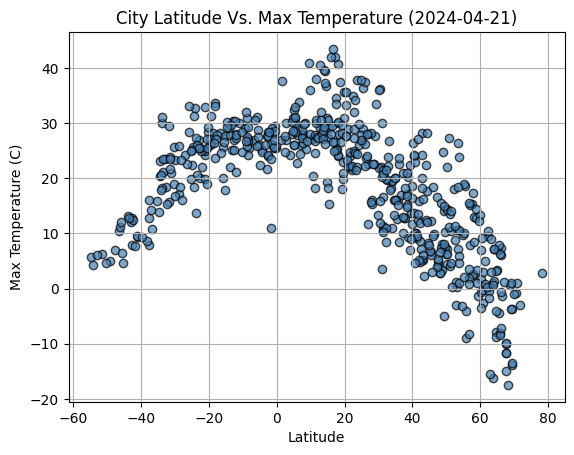

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='steelblue', alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
date = city_data_df['Date'][0]
time_tuple = time.gmtime(date)
date = time.strftime("%Y-%m-%d", time_tuple)

plt.title('City Latitude Vs. Max Temperature (' + str(date)+ ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

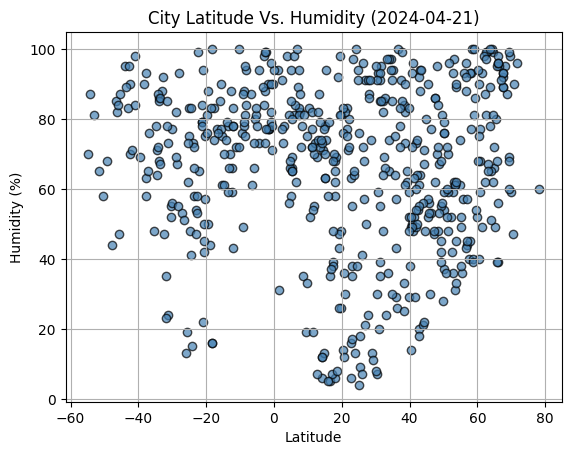

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='steelblue', alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity (' + str(date)+ ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

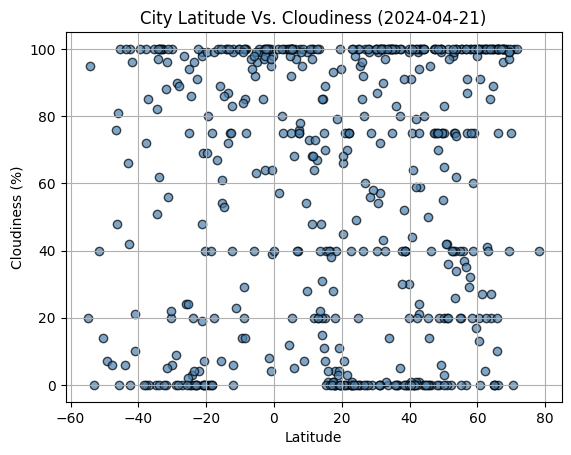

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='steelblue', alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (' + str(date)+ ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

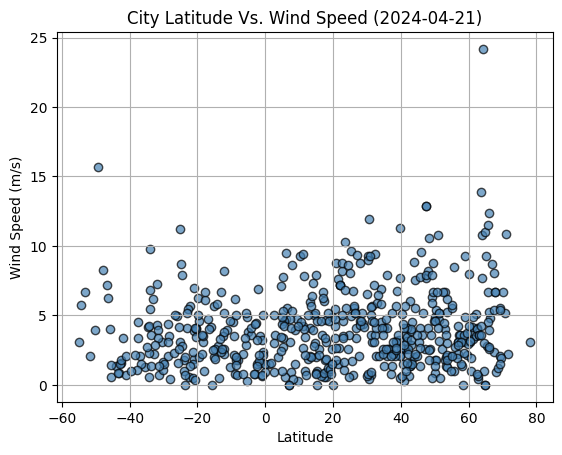

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='steelblue', alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (' + str(date)+ ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y, data, text_x, text_y, title=None, xlabel=None, ylabel=None):
    # Scatter plot
    plt.scatter(data[x], data[y], alpha=0.7)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    
    # Plot the regression line
    plt.plot(data[x], slope * data[x] + intercept, color='red')

    # Equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Set title and labels
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.text(text_x, text_y, equation, transform=plt.gca().transAxes, fontsize=12,  color='red' )
    
    # r value
    print('The r-value is: ', r_value)
    
    # Show the plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chinde,26.8418,88.0763,22.58,21,60,3.36,NP,1713707165
2,loen,7.7601,168.2307,27.82,82,100,8.62,MH,1713707166
3,hadibu,12.6500,54.0333,29.08,69,67,1.86,YE,1713707167
4,bilibino,68.0546,166.4372,-17.47,95,100,0.96,RU,1713707167
6,isafjordur,66.0755,-23.1240,6.02,56,75,12.35,IS,1713707168


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.47,75,94,11.22,PN,1713707050
5,vila velha,-20.3297,-40.2925,28.31,75,40,4.12,BR,1713706920
7,uturoa,-16.7333,-151.4333,28.13,77,67,4.75,PF,1713707170
11,port-aux-francais,-49.3500,70.2167,4.94,68,7,15.67,TF,1713707176
12,minas de marcona,-15.2119,-75.1103,17.88,75,54,1.99,PE,1713707176


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.837276920661599


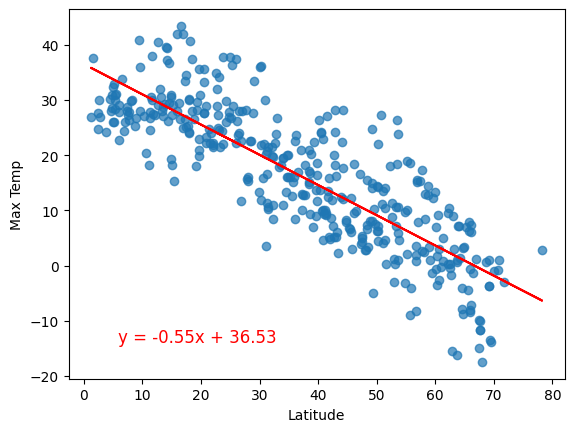

In [16]:
# Linear regression on Northern Hemisphere

linear_regression_plot('Lat', 'Max Temp', northern_hemi_df, 0.1, 0.1, xlabel='Latitude', ylabel='Max Temp')

The r-value is:  0.7440150354150821


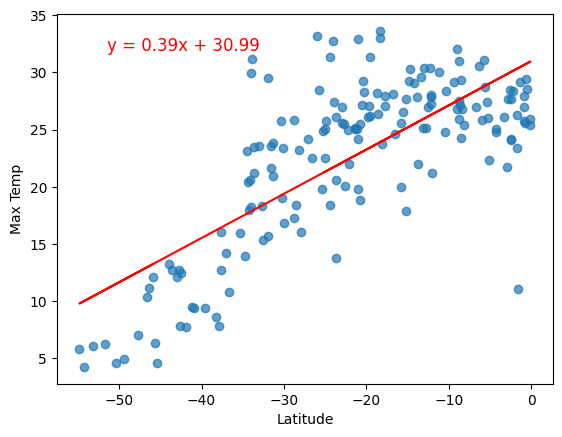

In [17]:
# Linear regression on Southern Hemisphere
linear_regression_plot('Lat', 'Max Temp', southern_hemi_df, 0.1, 0.9, xlabel='Latitude', ylabel='Max Temp')

**Discussion about the linear relationship:** 
The above two scatter plots with linear regression lines can be analyzed to understand the relationship between latitude and maximum tremperature of nothern hemisphere and southern hemisphere.

According to the 1st graph, there is a negetive slope in the linear relationship. It means that, max temperature decreases when latitude increases. In other words, temperature decreases when moving away from the equator.

2nd graph shows a positive linear relationship among the latitude and the max temperature in the sourthern hemisphere. When latitude increases, temperature also increases. In other terms, temperature increases, when moving towards the equator.

R value for two linear regression models, -0.8422 and 0.7311 respectively. Which are close to -1 and 1. So we can determine that these two linear regression models are fit enough with the sample of data to observe the relationship among two entities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.13973053050640286


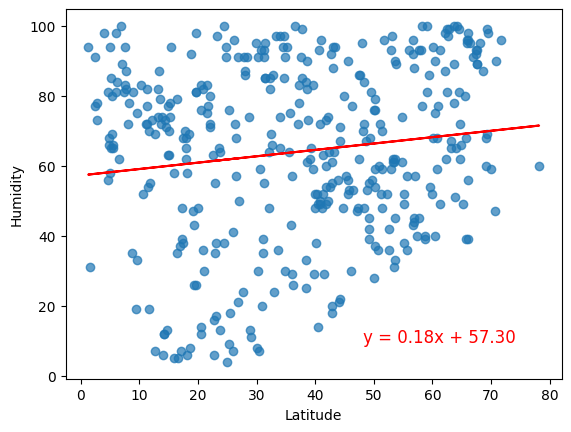

In [18]:
# Northern Hemisphere
linear_regression_plot('Lat', 'Humidity', northern_hemi_df, 0.6, 0.1, xlabel='Latitude', ylabel='Humidity')

The r-value is:  0.15907171305708345


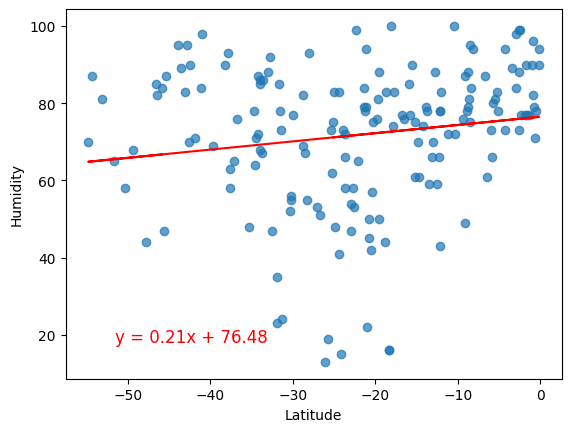

In [19]:
# Southern Hemisphere
linear_regression_plot('Lat', 'Humidity', southern_hemi_df, 0.1, 0.1, xlabel='Latitude', ylabel='Humidity')

**Discussion about the linear relationship:** 

Two graphs shows the scatter plots and linear relationship among the latitude and humidity. Both reltionships are positive relationships. R values for two models are 0.1182 and 0.2110 respectively, which are more closer to 0. So, the two relationships cannot be used to describe the entire data sample.
How ever the we can come to a conclusion that, in both nothern hemisphere and southern hemisphere, there is a tendency to slightly increase humidity level with the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.09044321983307053


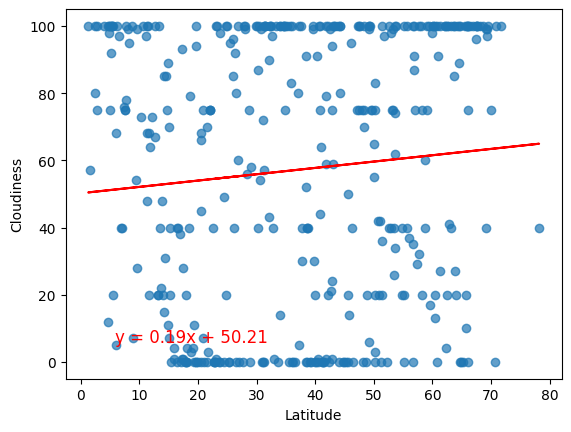

In [20]:
# Northern Hemisphere
linear_regression_plot('Lat', 'Cloudiness', northern_hemi_df, 0.1, 0.1, xlabel='Latitude', ylabel='Cloudiness')

The r-value is:  0.2626453087094367


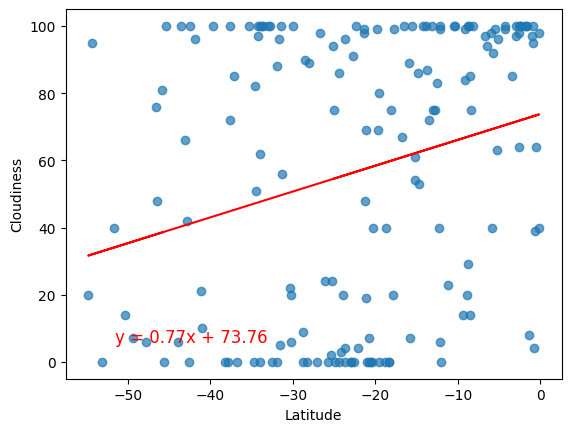

In [21]:
# Southern Hemisphere
linear_regression_plot('Lat', 'Cloudiness', southern_hemi_df, 0.1, 0.1, xlabel='Latitude', ylabel='Cloudiness')

**Discussion about the linear relationship:** 

Coefficient of correlation for the 1st graph is 0.0762, which is very close to 0. So the linear regression model does not describe the data set properly. 

2nd graph, Latitude vs Clodiness of Southern hemisphere has a r value of 0.2762, which is not describing the entire data set. But, by observing the population and the obtained linear relationship we can see that cities closer to the equator are more cloudy in southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.09078476779727983


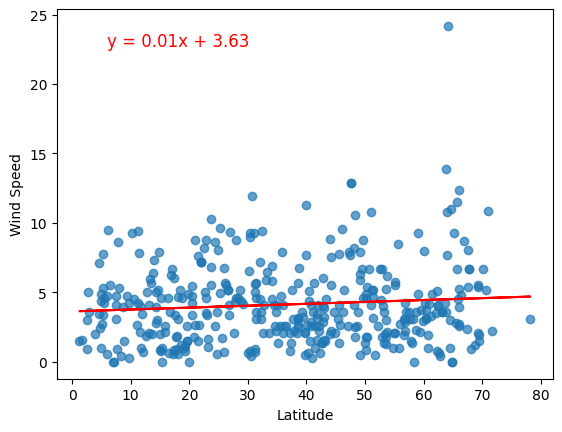

In [22]:
# Northern Hemisphere
linear_regression_plot('Lat', 'Wind Speed', northern_hemi_df, 0.1, 0.9, xlabel='Latitude', ylabel='Wind Speed')

The r-value is:  -0.1342373445565733


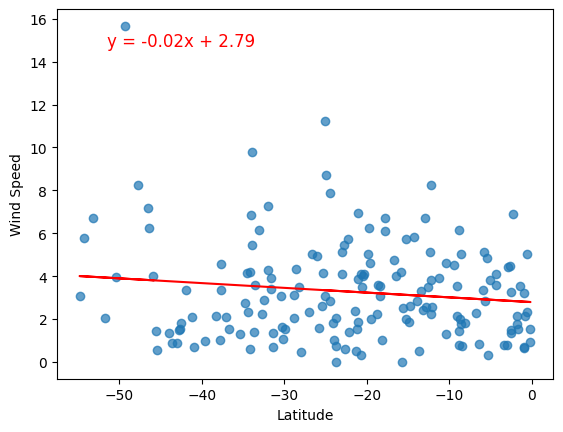

In [23]:
# Southern Hemisphere
linear_regression_plot('Lat', 'Wind Speed', southern_hemi_df, 0.1, 0.9, xlabel='Latitude', ylabel='Wind Speed')

**Discussion about the linear relationship:** 
R values for both linear regression models are more closer to 0. So the linear relationships cannot be used to describe two datasets. But, by observing both the data population and lnear relationship we can come to a conslusion, that wind speed comparatively low in cities near the equator.